# [Îã§Î≥ÄÎüâ ÏÑ†Ìòï ÌôïÎ•†Í≥ºÏ†ï](https://today-1.tistory.com/38)

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'D2Coding'
import seaborn as sns 

from tqdm import tqdm
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
import sys 

sys.path.append("../../../")

from asset.common.utils import load_stock

In [3]:
import easydict
args = easydict.EasyDict()

args.SEED = 42

args.save_stock_preprocessing_path = '../../../data/stock/preprocessing/{stock_code}.csv'

# Data

In [4]:
save_path = '../../../data/meta/stock_corps.csv'
df_dtype = {
    'stock_code': 'object'
}

df_corps = pd.read_csv(save_path, dtype=df_dtype)

print(f'{df_corps.shape} / {df_corps.isnull().sum().sum()}')
df_corps.head()

(2494, 13) / 20


corp_code corp_name stock_code corp_cls corp_cls_nm                 sector  \
0     956028    ÏóëÏÑ∏Ïä§Î∞îÏù¥Ïò§     950130        K      kosdaq  ÏùòÎ£åÏö©Ìíà Î∞è Í∏∞ÌÉÄ ÏùòÏïΩ Í¥ÄÎ†®Ï†úÌíà Ï†úÏ°∞ÏóÖ   
1     783246    Í∏ÄÎ°úÎ≤åÏóêÏä§Ïó†     900070        K      kosdaq                 Í∏∞ÌÉÄ Í∏àÏúµÏóÖ   
2    1170962       GRT     900290        K      kosdaq                 Í∏∞ÌÉÄ Í∏àÏúµÏóÖ   
3     600013    ÎßµÏä§Î¶¨ÏñºÌã∞1     094800        Y       kospi            Ïã†ÌÉÅÏóÖ Î∞è ÏßëÌï©Ìà¨ÏûêÏóÖ   
4    1139266       Î°úÏä§Ïõ∞     900260        K      kosdaq                 Í∏∞ÌÉÄ Í∏àÏúµÏóÖ   

                                    product industry_wics_ss_nm  \
0             ÎßêÎùºÎ¶¨ÏïÑ ÏßÑÎã®ÌÇ§Ìä∏(RDT), HIV ÏßÑÎã®ÌÇ§Ìä∏(RDT)          ÏÉùÎ™ÖÍ≥ºÌïôÎèÑÍµ¨Î∞èÏÑúÎπÑÏä§   
1    ÏûêÌöåÏÇ¨ Ï†úÌíà : ITÍ∏∞Í∏∞Ïö© Ï†ïÎ∞Ä ÌôîÏä§ÎÑàÎ∂ÄÌíà(Ïä§ÌÅ¨Î•ò, ÏÉ§ÌîÑÌä∏, Ïä§ÌîÑÎßÅ)               ÏûêÎèôÏ∞®Î∂ÄÌíà   
2                                Í¥ëÌïôÌïÑÎ¶Ñ, Ìè¨Ïû•ÌïÑÎ¶Ñ                  ÌôîÌïô   
3                                       NaN                 ÎØ∏Î∂ÑÎ•ò   
4  CAN Control Gateway, CANÍ∏∞Îä•Î™®Îìà, BCM Ï∞®Ï≤¥Ï†úÏñ¥Î™®Îìà               ÏûêÎèôÏ∞®Î∂ÄÌíà   

   industry_wics_ss_cd  industry_wics_ms_cd industry_wics_ms_nm  \
0               352030                 3520             Ï†úÏïΩÍ≥ºÏÉùÎ¨ºÍ≥µÌïô   
1               251010                 2510              ÏûêÎèôÏ∞®ÏôÄÎ∂ÄÌíà   
2               151010                 1510                  ÏÜåÏû¨   
3                    0                    0                 NaN   
4               251010                 2510              ÏûêÎèôÏ∞®ÏôÄÎ∂ÄÌíà   

   industry_wics_ls_cd industry_wics_ls_nm  
0                   35                Í±¥Í∞ïÍ¥ÄÎ¶¨  
1                   25             Í≤ΩÍ∏∞Í¥ÄÎ†®ÏÜåÎπÑÏû¨  
2                   15                  ÏÜåÏû¨  
3                    0                 NaN  
4                   25             Í≤ΩÍ∏∞Í¥ÄÎ†®ÏÜåÎπÑÏû¨

In [5]:
c1 = df_corps['corp_name'] == 'NAVER'
c2 = df_corps['corp_name'] == 'Ïπ¥Ïπ¥Ïò§'
c = c1 | c2

df_corps.loc[c]

corp_code corp_name stock_code corp_cls corp_cls_nm  \
902      258801       Ïπ¥Ïπ¥Ïò§     035720        Y       kospi   
1571     266961     NAVER     035420        Y       kospi   

                                sector          product industry_wics_ss_nm  \
902   ÏûêÎ£åÏ≤òÎ¶¨, Ìò∏Ïä§ÌåÖ, Ìè¨ÌÑ∏ Î∞è Í∏∞ÌÉÄ Ïù∏ÌÑ∞ÎÑ∑ Ï†ïÎ≥¥Îß§Í∞ú ÏÑúÎπÑÏä§ÏóÖ  Ïù∏ÌÑ∞ÎÑ∑ ÏÑúÎπÑÏä§(Ïù∏ÌÑ∞ÎÑ∑ Í¥ëÍ≥†)          ÏñëÎ∞©Ìñ•ÎØ∏ÎîîÏñ¥ÏôÄÏÑúÎπÑÏä§   
1571  ÏûêÎ£åÏ≤òÎ¶¨, Ìò∏Ïä§ÌåÖ, Ìè¨ÌÑ∏ Î∞è Í∏∞ÌÉÄ Ïù∏ÌÑ∞ÎÑ∑ Ï†ïÎ≥¥Îß§Í∞ú ÏÑúÎπÑÏä§ÏóÖ  Ìè¨ÌÑ∏ ÏÑúÎπÑÏä§ Î∞è Ïò®ÎùºÏù∏ Í¥ëÍ≥†          ÏñëÎ∞©Ìñ•ÎØ∏ÎîîÏñ¥ÏôÄÏÑúÎπÑÏä§   

      industry_wics_ss_cd  industry_wics_ms_cd industry_wics_ms_nm  \
902                502050                 5020          ÎØ∏ÎîîÏñ¥ÏôÄÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏   
1571               502050                 5020          ÎØ∏ÎîîÏñ¥ÏôÄÏóîÌÑ∞ÌÖåÏù∏Î®ºÌä∏   

      industry_wics_ls_cd industry_wics_ls_nm  
902                    50           Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖòÏÑúÎπÑÏä§  
1571                   50           Ïª§ÎÆ§ÎãàÏºÄÏù¥ÏÖòÏÑúÎπÑÏä§

In [6]:
stock_df_dict = load_stock(df_corps.loc[c]['stock_code'].values, args.save_stock_preprocessing_path)

stock_df_dict.keys()

  0%|          | 0/2 [00:00<?, ?it/s]

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 2/2 [00:00<00:00, 29.79it/s]


dict_keys(['035720', '035420'])

In [9]:
df_corps.loc[c][['stock_code', 'corp_name']].values

array([['035720', 'Ïπ¥Ïπ¥Ïò§'],
       ['035420', 'NAVER']], dtype=object)

In [15]:
df = pd.DataFrame()

for corp in df_corps.loc[c][['stock_code', 'corp_name']].values:

    _df = stock_df_dict[corp[0]][['Close']]
    _df.rename(columns={'Close':corp[1]}, inplace=True)
    df = pd.concat([df, _df], axis=1)

/var/folders/tv/05qbcb8954z9x1yvqv_kr2t80000gn/T/ipykernel_38540/3858286972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.rename(columns={'Close':corp[1]}, inplace=True)
/var/folders/tv/05qbcb8954z9x1yvqv_kr2t80000gn/T/ipykernel_38540/3858286972.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.rename(columns={'Close':corp[1]}, inplace=True)


In [16]:
df = df.loc['2020-01-02':]
df.isnull().sum()

Ïπ¥Ïπ¥Ïò§      3
NAVER    0
dtype: int64

In [17]:
c = df['Ïπ¥Ïπ¥Ïò§'].isnull()

df.loc[c]

Ïπ¥Ïπ¥Ïò§     NAVER
Date                     
2021-04-12  NaN  385500.0
2021-04-13  NaN  388500.0
2021-04-14  NaN  391500.0

In [22]:
df = df.dropna()
df.isnull().sum()

Ïπ¥Ïπ¥Ïò§      0
NAVER    0
dtype: int64

In [30]:
df = df[['NAVER', 'Ïπ¥Ïπ¥Ïò§']]
df.head()

NAVER      Ïπ¥Ïπ¥Ïò§
Date                         
2020-01-02  182500.0  30609.0
2020-01-03  181500.0  30609.0
2020-01-06  180500.0  31010.0
2020-01-07  187000.0  32114.0
2020-01-08  183000.0  32014.0

<Axes: xlabel='Date'>

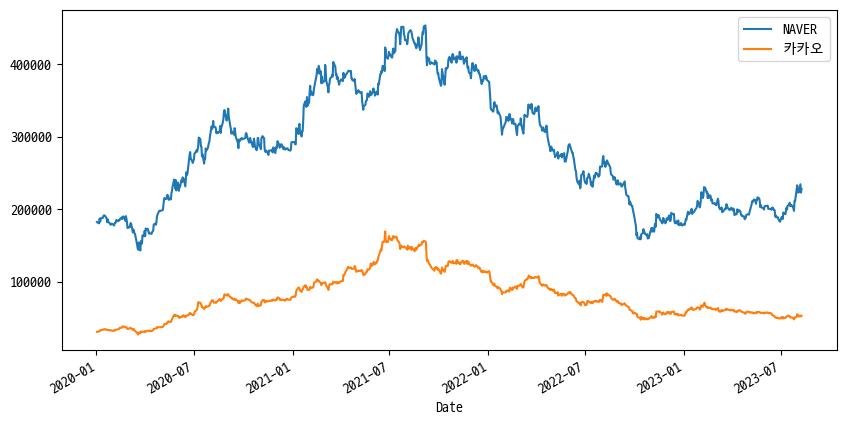

In [31]:
df.plot(figsize=(10,5))

# Î≤°ÌÑ∞ÏûêÍ∏∞ÌöåÍ∑Ä Î™®Ìòï(VAR)
- Ï¢ÖÏÜç Î≥ÄÏàòÏôÄ ÎèÖÎ¶Ω Î≥ÄÏàòÎäî ÏÉÅÌò∏ ÏòÅÌñ•ÏùÑ Î∞õÎäî Ï°¥Ïû¨.
- Îëê Î≥ÄÏàòÎì§ Ï§ë Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ï¢ÖÏÜçÎ≥ÄÏàòÎ°ú Ï†ÅÌï©ÌïúÏßÄÏóê ÎåÄÌïú Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ VARÏùÑ ÌôúÏö©.

In [32]:
import statsmodels.api as sm

- Îç∞Ïù¥ÌÑ∞Îäî Ï∞®Î∂ÑÌïòÏó¨ Ï†ïÏÉÅÌôî 

In [33]:
fit = sm.tsa.VAR(df.diff(1).dropna()).fit(maxlags=2)
fit.summary()

/Users/gyoungwon-cho/.pyenv/versions/3.11.3/envs/stock-venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 09, Aug, 2023
Time:                     23:59:54
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    32.1826
Nobs:                     887.000    HQIC:                   32.1492
Log likelihood:          -16756.2    FPE:                8.97989e+13
AIC:                      32.1286    Det(Omega_mle):     8.87950e+13
--------------------------------------------------------------------
Results for equation NAVER
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const           54.857530       211.919224            0.259           0.796
L1.NAVER        -0.057263         0.046962           -1.219           0.223
L1.Ïπ¥Ïπ¥Ïò§           0.267944         0.142229            1.884           0.06

### ÏòàÏ∏° Î∞è ÏãúÍ∞ÅÌôî

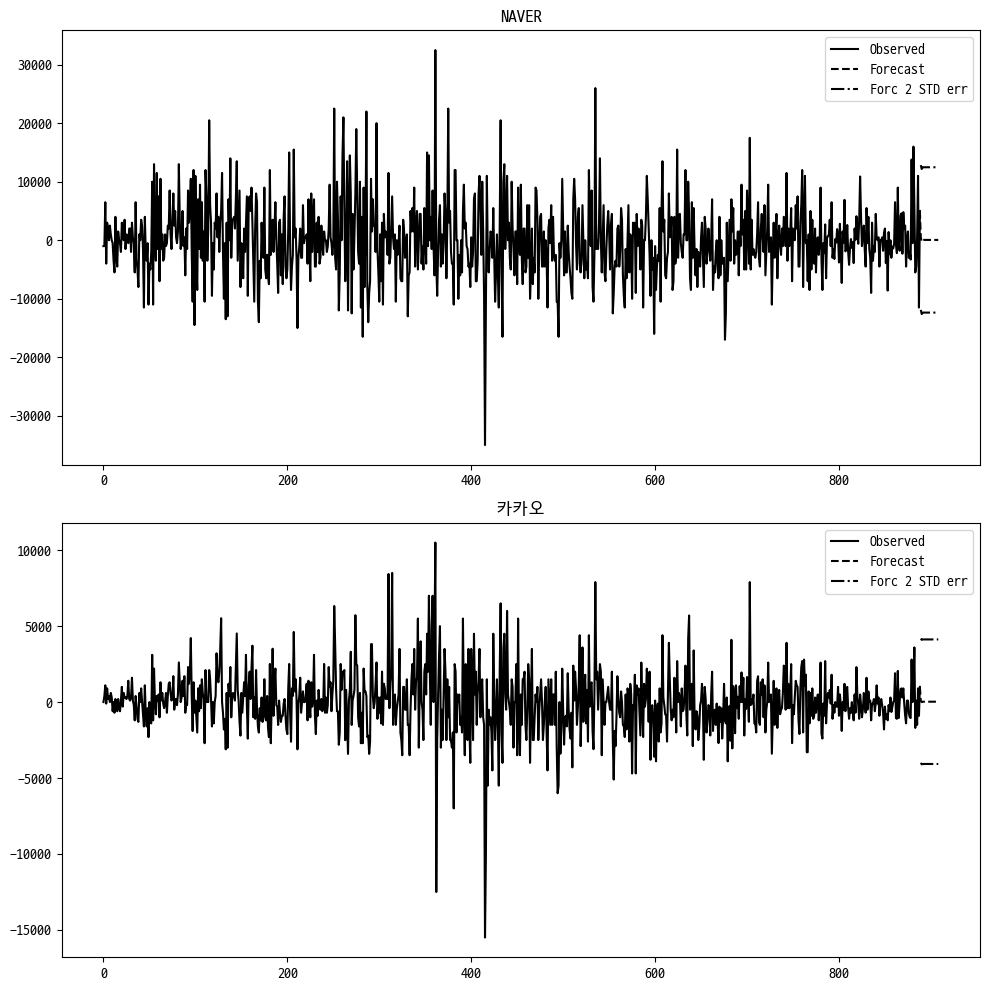

In [34]:
forecast_num = 20
fit.plot_forecast(forecast_num)

plt.tight_layout()
plt.show()

### ÏûÑÌéÑÏä§Î∞òÏùëÌï®Ïàò Ï∂îÏ†ï

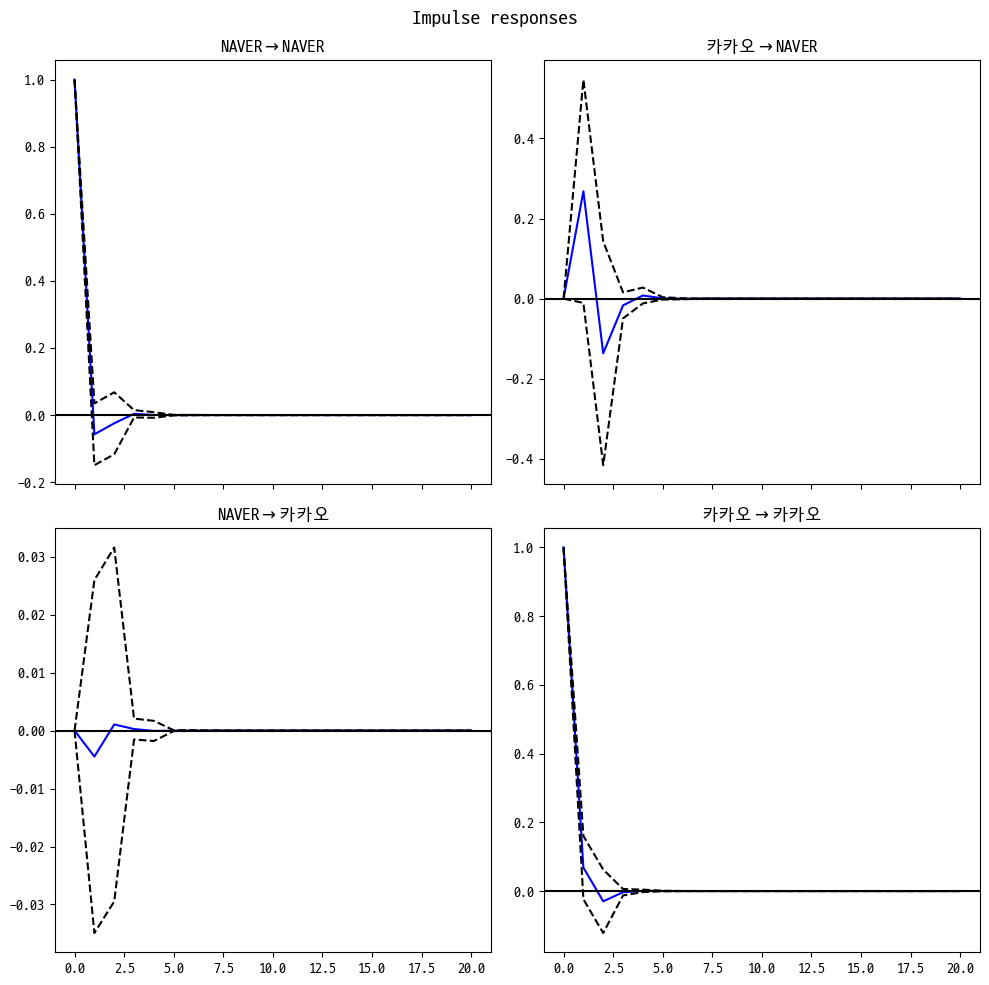

In [35]:
fit.irf(forecast_num).plot()
plt.tight_layout()
plt.show()

# Í∑∏ÎûòÏù∏Ï†Ä Ïù∏Í≥ºÍ¥ÄÍ≥Ñ Î™®Ìòï(Granger Causality Model)
- 'Îã≠Ïù¥ Î®ºÏ†ÄÎÉê Îã¨Í±ÄÏù¥ Î®ºÏ†ÄÎÉê' Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Îïå ÏÇ¨Ïö©
    - Ï∂îÎ°†Î∂àÍ∞ÄÌïú Î¨∏Ï†ú: "Îã≠Ïù¥ Î®ºÏ†ÄÏù∏Í∞Ä Îã¨Í±ÄÏù¥ Î®ºÏ†ÄÏù∏Í∞Ä?" (Ïù∏Í≥ºÍ¥ÄÍ≥Ñ)
    - Ï∂îÎ°†Í∞ÄÎä•Ìïú Î¨∏Ï†ú: "Îã≠Í≥º Îã¨Í±ÄÏùò ÏÉùÏÑ±ÏàúÏÑú Î≥Ñ ÏÑúÎ°úÏùò ÏòÅÌñ•Î†•ÏùÄ Ïñ¥Îñ§Í∞Ä?" (Granger Ïù∏Í≥ºÍ¥ÄÍ≥Ñ)
- ÏõêÏù∏Í≥º Ïù∏Í≥º Í¥ÄÍ≥ÑÎ•º Í∑úÎ™ÖÌïòÎäî Ïñ¥Î†µÍ∏∞ ÎïåÎ¨∏Ïóê ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îëê ÏöîÏù∏ Ï§ë Î®ºÏ†Ä ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî Î≥ÄÏàòÎ•º ÏïåÏïÑÎ≥¥Í≥†Ïûê Ìï† Îïå ÏÇ¨Ïö©
    - Í∑ÄÎ¨¥Í∞ÄÏÑ§(Null Hypothesis, ùêª0H0): Ìïú Î≥ÄÏàòÍ∞Ä Îã§Î•∏ Î≥ÄÏàòÎ•º ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§
    - ÎåÄÎ¶ΩÍ∞ÄÏÑ§(Alternative Hypothesis, ùêª1H1): Ìïú Î≥ÄÏàòÍ∞Ä Îã§Î•∏ Î≥ÄÏàòÎ•º ÏòàÏ∏°ÌïòÎäîÎç∞ ÎèÑÏõÄÏù¥ ÎêúÎã§

In [36]:
print('\n[naver -> kakao]')
granger_result1 = sm.tsa.stattools.grangercausalitytests(df.diff(1).dropna().iloc[:,:].values, maxlag=3, verbose=True)


[naver -> kakao]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.2416  , p=0.0721  , df_denom=885, df_num=1
ssr based chi2 test:   chi2=3.2526  , p=0.0713  , df=1
likelihood ratio test: chi2=3.2466  , p=0.0716  , df=1
parameter F test:         F=3.2416  , p=0.0721  , df_denom=885, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.2391  , p=0.1072  , df_denom=882, df_num=2
ssr based chi2 test:   chi2=4.5035  , p=0.1052  , df=2
likelihood ratio test: chi2=4.4921  , p=0.1058  , df=2
parameter F test:         F=2.2391  , p=0.1072  , df_denom=882, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.2967  , p=0.0200  , df_denom=879, df_num=3
ssr based chi2 test:   chi2=9.9690  , p=0.0188  , df=3
likelihood ratio test: chi2=9.9133  , p=0.0193  , df=3
parameter F test:         F=3.2967  , p=0.0200  , df_denom=879, df_num=3


/Users/gyoungwon-cho/.pyenv/versions/3.11.3/envs/stock-venv/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [37]:
print('\n[kakao -> naver]') 
granger_result2 = sm.tsa.stattools.grangercausalitytests(df.diff(1).dropna().iloc[:,[1,0]].values, maxlag=3, verbose=True)


[kakao -> naver]

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0902  , p=0.7640  , df_denom=885, df_num=1
ssr based chi2 test:   chi2=0.0905  , p=0.7635  , df=1
likelihood ratio test: chi2=0.0905  , p=0.7636  , df=1
parameter F test:         F=0.0902  , p=0.7640  , df_denom=885, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0452  , p=0.9559  , df_denom=882, df_num=2
ssr based chi2 test:   chi2=0.0908  , p=0.9556  , df=2
likelihood ratio test: chi2=0.0908  , p=0.9556  , df=2
parameter F test:         F=0.0452  , p=0.9559  , df_denom=882, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7973  , p=0.1461  , df_denom=879, df_num=3
ssr based chi2 test:   chi2=5.4348  , p=0.1426  , df=3
likelihood ratio test: chi2=5.4182  , p=0.1436  , df=3
parameter F test:         F=1.7973  , p=0.1461  , df_denom=879, df_num=3


# Í≥µÏ†ÅÎ∂Ñ Î™®Ìòï(Coointegration Model)
- Í≥µÏ†ÅÎ∂Ñ ÏÉÅÌÉú = Îëê ÎπÑÏ†ïÏÉÅÏÑ± ÏãúÍ≥ÑÏó¥ÏùÑ ÏÑ†ÌòïÏ°∞Ìï©ÌïòÏó¨ ÏÉùÏÑ±Ìïú ÏãúÍ≥ÑÏó¥Ïùò Ï†ÅÎ∂Ñ Ï∞®ÏàòÍ∞Ä ÎÇÆÏïÑÏßÄÍ±∞ÎÇò Ï†ïÏÉÅÏÉÅÌÉúÍ∞Ä ÎêòÎäî Í≤ΩÏö∞
- Í≥µÏ†ÅÎ∂Ñ ÏãúÍ≥ÑÏó¥ÏùÄ ÏÑúÎ°ú ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏßÄ ÏïäÎçîÎùºÎèÑ Ïû•Í∏∞Ï†ÅÏúºÎ°ú Í∞ôÏùÄ Î∞©Ìñ•ÏúºÎ°ú ÏõÄÏßÅÏù¥Îäî ÌäπÏÑ±ÏùÑ ÏßÄÎãò
- ÌéòÏñ¥ Ìä∏Î†àÏù¥Îî© Ï†ÑÎûµÏóê ÌôúÏö© Îê®

In [40]:
sm.tsa.coint(df['NAVER'],df['Ïπ¥Ïπ¥Ïò§'])

(-2.386912770623689,
 0.3310782087657893,
 array([-3.90880177, -3.34301164, -3.0492242 ]))